### Desafío - Analisis Lineal Discriminante
#### CAMILA VERA VILLA
#### AGOSTO  28

### Descripción
Trabajaremos con una base de datos sobre clientes morosos de un banco. Dentro de ésta se registran las siguientes observaciones:
* default : Variable Binaria. Registra si el cliente entró en morosidad o no.
* income : Ingreso promedio declarado por el cliente.
* balance : total del saldo en la cuenta de crédito.
* student : Variable binaria. Registra si el cliente es estudiante o no.

### Ejercicio 1: Preparación de ambiente de trabajo
* Importe los módulos básicos para el análisis de datos.
* Importe las clases LabelEncoder , StandardScaler y LabelBinarizer de preprocessing 
* Importe las funciones train_test_split y cross_val_score de model_selection
* Importe la función classification_report de metrics
* Importe las clases LinearDiscriminantAnalysis y QuadraticDiscriminantAnalysis * Agregue la base de datos en el ambiente de trabajo.
* Inspeccione la distribución de cada atributo

In [1]:
# librerias clasicas
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

#libreria sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report


# librerias para graficar
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns


In [2]:
#carga dataset
df= pd.read_csv("default_credit.csv").drop(columns='index')
df.head(10)

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
5,No,Yes,919.588530,7491.558572
6,No,No,825.513331,24905.226578
7,No,Yes,808.667504,17600.451344
8,No,No,1161.057854,37468.529288
9,No,No,0.000000,29275.268293


In [3]:
df.shape

(10000, 4)

In [4]:
df.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [5]:
df.sample(5)

,default,student,balance,income
6170,No,No,1561.533530,54594.846708
8757,No,Yes,1486.377300,19164.350400
4503,No,No,1616.108734,33046.187935
4758,No,Yes,1331.980568,20672.339541
863,No,Yes,1961.728657,17864.099254


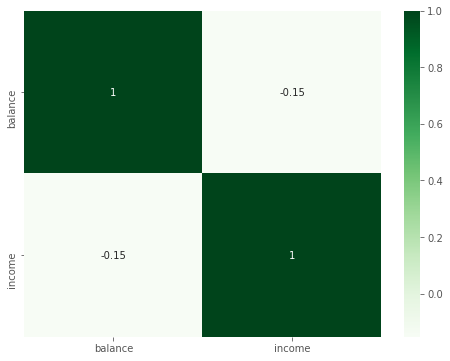

In [6]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, cmap = 'Greens')

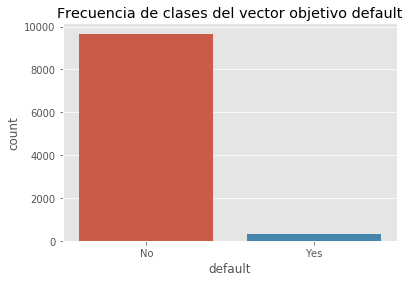

In [7]:
#vector objetivo
sns.countplot(df['default'])
plt.title('Frecuencia de clases del vector objetivo default');

Las clases estan desbalanceadas, hay mayor cantidad de no morosos, por lo que el modelo puede aprender muy poco de la clase minoritaria. Este desbalance se puede aliviar con el metodo SMOTE. 

### Ejercicio 2: Modelo base
* Recuerde que los modelos de sklearn no soportan datos que no sean numéricos. Transforme los atributos pertinentes con LabelEncoder.
* Genere muestras de validación y entrenamiento, reservando un 33% de los datos como validación.
* Genere un modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.
* Genere métricas de evaluación utilizando classification_report.
* Comente sobre cuál es el desempeño del modelo en cada clase, así como en general.

In [8]:
df.columns

Index(['default', 'student', 'balance', 'income'], dtype='object')

In [9]:
df.dtypes

default     object
student     object
balance    float64
income     float64
dtype: object

In [10]:
df['student'] = LabelEncoder().fit_transform(df['student'])
df['default'] = LabelEncoder().fit_transform(df['default'])

In [11]:
df.dtypes

default      int32
student      int32
balance    float64
income     float64
dtype: object

In [12]:
#muestras de entrenamiento y validacion
y= df['default']
x = df.drop('default', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.33, random_state=25)

In [13]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


#### Modelo con LinearDiscriminantAnalysis sin modificar los hiperparámetros.

In [14]:
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [15]:
y_hat = lda_model.predict(x_test)
print('* Modelo LDA con sin modificar hiperparametros :')
print(classification_report(y_test, y_hat))

* Modelo LDA con sin modificar hiperparametros :
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3195
           1       0.71      0.24      0.36       105

    accuracy                           0.97      3300
   macro avg       0.84      0.62      0.67      3300
weighted avg       0.97      0.97      0.97      3300



#### Ejercicio 3: Refactorización 1 - información a priori
Dado que trabajamos con modelos generativos, podemos incluír información exógena. Para este caso agregaremos dos distribuciones:
* Asumamos que hay un 50/50 de morosos y no morosos.
* Asumamos que hay un 60/40 de morosos y no morosos.
* Por cada modelo, reporte las métricas de clasificación.

In [16]:
lda_prior_preds = LinearDiscriminantAnalysis(priors=[.5,.5]).fit(x_train, y_train).predict(x_test)

print(' 50/50 de morosos y no morosos:')
print(classification_report(y_test,lda_prior_preds))

 50/50 de morosos y no morosos:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3195
           1       0.15      0.92      0.27       105

    accuracy                           0.84      3300
   macro avg       0.58      0.88      0.59      3300
weighted avg       0.97      0.84      0.89      3300



In [17]:
lda_prior_preds = LinearDiscriminantAnalysis(priors=[.6,.4]).fit(x_train, y_train).predict(x_test)

print(' 60/40 de morosos y no morosos:')
print('* Modelo LDA con distribuciones :')
print(classification_report(y_test,lda_prior_preds))

 60/40 de morosos y no morosos:
* Modelo LDA con distribuciones :
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3195
           1       0.18      0.85      0.29       105

    accuracy                           0.87      3300
   macro avg       0.59      0.86      0.61      3300
weighted avg       0.97      0.87      0.91      3300



### Ejercicio 4: Refactorización 2 - oversampling

Digresión: Synthetic Over(Under)Sampling
* Por lo general podemos intentar aliviar el problema del desbalance de clases mediante la ponderación dentro del algoritmo. Otra alternativa es el muestreo con reemplazo dentro de los conjuntos de entrenamiento. Estos métodos clásicos se conocen como Oversampling cuando repetimos registros aleatorios de la clase minoritaria, y Undersampling cuando eliminamos aleatoriamente registros de la clase mayoritaria.
* Un contratiempo de estos métodos clásicos es que pueden replicar información sesgada que afecte el desempeño de generalización del modelo. Si los datos son malos, estaremos replicando estas fallas.
* Otra solución es generar ejemplos de entrenamiento sintéticos mediante el entrenamiento de ejemplos de la clase minoritaria. A grandes rasgos la solución funciona de la siguiente forma: En función a un subconjunto de datos correspondientes a la case minoritaria, entrenamos algún modelo no supervisado o generativo como Naive Bayes, KMeans o KNearestNeighbors para generar representaciones sintéticas de los datos en el espacio de atributos de la clase específica mediante $\mathbf{x}{\textsf{nuevo-ejemplo}} = \mathbf{x}{i} + \lambda (\mathbf{x}{zi} - \mathbf{x}{i})$ donde $\mathbf{x}_{zi}$ es un
ejemplo de entrenamiento de la clase minoritaria y $\lambda$ es un parámetro de
interpolación aleatorio $\lambda \sim \textsf{Uniforme}(0, 1)$.

* Uno de los problemas más graves de esta base de datos, es el fuerte desbalance entre clases.
Ahora generaremos observaciones sintéticas mediante SMOTE (Synthetic Minority
Oversampling Technique). Para ello, debemos agregar el paquete a nuestro ambiente virtual. En nuestro terminal agregamos conda install -c conda-forge imbalanced-learn . Incorpore SMOTE en el ambiente de trabajo con la siguiente sintáxis from imblearn.over_sampling import SMOTE .
* Para implementar oversampling, debemos generar nuevos objetos que representan nuestra muestra de entrenamiento incrementada artificialmente. Para ello implemente la siguiente sintaxis:

```python
from imblearn.over_sampling import SMOTE
# Instanciamos la clase
oversampler = SMOTE(random_state=11238, ratio='minority')
# generamos el eversampling de la matriz de entrenamiento y
X_train_oversamp, y_train_oversamp = oversampler.fit_sample(X_train, y_train)

Vuelva a entrenar el modelo con los datos aumentados de forma artificial y comente sobre su
desempeño.
```

In [18]:
from imblearn.over_sampling import SMOTE
# Instanciar la clase
oversampler = SMOTE(random_state=25, ratio='minority')

# generamos el oversampling de la matriz de entrenamiento 
x_train_oversamp, y_train_oversamp = oversampler.fit_sample(x_train, y_train)


Using TensorFlow backend.


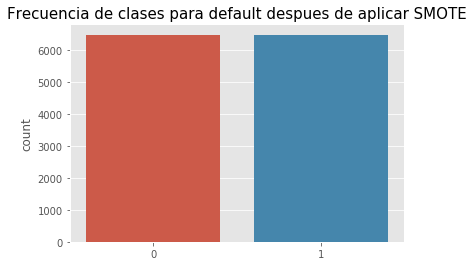

In [19]:
plt.title('Frecuencia de clases para default despues de aplicar SMOTE', size = 15)
sns.countplot(y_train_oversamp)

In [20]:
lda_model_oversampling = LinearDiscriminantAnalysis()
lda_model_oversampling.fit(x_train_oversamp, y_train_oversamp)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [21]:
y_hat_oversampling = lda_model_oversampling.predict(x_test)
print('* Modelo Oversampled LDA solo con test:')
print(classification_report(y_test, y_hat_oversampling))

* Modelo Oversampled LDA solo con test:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91      3195
           1       0.15      0.90      0.26       105

    accuracy                           0.84      3300
   macro avg       0.57      0.87      0.58      3300
weighted avg       0.97      0.84      0.89      3300



### Ejercicio 5: Refactorización 3 - QDA
* Por último, implemente un modelo QuadraticDiscriminantAnalysis con los datos
aumentados artificialmente. Genere las métricas de desempeño.
* Comente a grandes rasgos sobre el mejor modelo en su capacidad predictiva.

#### Sin oversamp

In [22]:
qda_smote = QuadraticDiscriminantAnalysis().fit(x_train, y_train)
qda_smote_preds = qda_smote.predict(x_test)

In [23]:
print('* Modelo QDA:')
print(classification_report(y_test, qda_smote_preds))

* Modelo QDA:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3195
           1       0.64      0.28      0.39       105

    accuracy                           0.97      3300
   macro avg       0.81      0.64      0.69      3300
weighted avg       0.97      0.97      0.97      3300



#### Con oversamp

In [24]:
qda_smote_oversamp = QuadraticDiscriminantAnalysis().fit(x_train_oversamp, y_train_oversamp)
qda_smote_preds_oversamp = qda_smote_oversamp.predict(x_test)

In [25]:
print('* Modelo QDA OVERSAMPLED:')
print(classification_report(y_test, qda_smote_preds_oversamp))

* Modelo QDA OVERSAMPLED:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      3195
           1       0.17      0.89      0.29       105

    accuracy                           0.86      3300
   macro avg       0.58      0.87      0.60      3300
weighted avg       0.97      0.86      0.90      3300



De acuerdo al Accuracy, el mejor modelo corresponde a QDA sin oversampling, con una metrica de 0.97, en contraste con 0.86 del modelo QDA con oversampling y  refactorizado LDA con 0.84.

                                                    ***